In [1]:
import polars as pl 
import numpy as np 
import ta

In [2]:
data_1m = pl.read_csv("BTCUSDT-1m-2023-11.csv")
data_1m = data_1m[['open_time', 'open', 'high', 'low', 'close', 'volume']]
data_1m = data_1m.with_columns(data_1m['open_time'].to_frame().with_columns(pl.from_epoch("open_time", time_unit="ms")))
data_1m = data_1m.with_columns(pl.Series(name = 'price', values = data_1m['close'].shift(-1)))
data_1m = data_1m.drop_nulls()
data_1m.head()

open_time,open,high,low,close,volume,price
datetime[ms],f64,f64,f64,f64,f64,f64
2023-11-01 00:00:00,34651.4,34676.5,34650.0,34669.9,376.04,34637.4
2023-11-01 00:01:00,34669.9,34684.0,34637.3,34637.4,431.177,34651.4
2023-11-01 00:02:00,34637.4,34653.4,34632.5,34651.4,175.894,34621.1
2023-11-01 00:03:00,34651.3,34651.4,34608.6,34621.1,476.587,34615.4
2023-11-01 00:04:00,34621.1,34622.6,34592.0,34615.4,546.312,34599.4


In [3]:
# Garman Klass volatility

data_1m = data_1m.with_columns(pl.Series(name = 'garman_klass', values = ((np.log(data_1m['high'] / data_1m['low'])) ** 2) / 2 - (2 * np.log(2) - 1) * (np.log(data_1m['close']) - np.log(data_1m['open'])) ** 2))
data_1m.head()

open_time,open,high,low,close,volume,price,garman_klass
datetime[ms],f64,f64,f64,f64,f64,f64,f64
2023-11-01 00:00:00,34651.4,34676.5,34650.0,34669.9,376.04,34637.4,1.8218e-7
2023-11-01 00:01:00,34669.9,34684.0,34637.3,34637.4,431.177,34651.4,5.6790e-7
2023-11-01 00:02:00,34637.4,34653.4,34632.5,34651.4,175.894,34621.1,1.1890e-7
2023-11-01 00:03:00,34651.3,34651.4,34608.6,34621.1,476.587,34615.4,4.7007e-7
2023-11-01 00:04:00,34621.1,34622.6,34592.0,34615.4,546.312,34599.4,3.8044e-7


In [4]:
# RSI
data_1m = data_1m.with_columns(pl.Series(name = 'rsi', values = ta.momentum.rsi(data_1m['close'].to_pandas(), 14)))
data_1m = data_1m.drop_nulls()
data_1m.head()

open_time,open,high,low,close,volume,price,garman_klass,rsi
datetime[ms],f64,f64,f64,f64,f64,f64,f64,f64
2023-11-01 00:13:00,34616.3,34616.4,34592.4,34612.5,188.053,34604.6,2.3585e-7,40.832323
2023-11-01 00:14:00,34612.4,34612.5,34593.3,34604.6,139.795,34601.3,1.3432e-7,38.646902
2023-11-01 00:15:00,34604.7,34620.1,34593.0,34601.3,203.441,34630.1,3.0288e-7,37.738277
2023-11-01 00:16:00,34601.3,34647.7,34601.3,34630.1,338.477,34615.8,6.3053e-7,49.006344
2023-11-01 00:17:00,34630.1,34636.6,34607.8,34615.8,166.35,34614.0,2.8008e-7,44.682282


In [5]:
# Bollinger Bands

data_1m = data_1m.with_columns(pl.Series(name = 'bb_low', values = ta.volatility.bollinger_lband(data_1m['close'].to_pandas(), 20)))
data_1m = data_1m.with_columns(pl.Series(name = 'bb_mid', values = ta.volatility.bollinger_mavg(data_1m['close'].to_pandas(), 20)))
data_1m = data_1m.with_columns(pl.Series(name = 'bb_high', values = ta.volatility.bollinger_hband(data_1m['close'].to_pandas(), 20)))

data_1m = data_1m.drop_nulls()
data_1m.head()

open_time,open,high,low,close,volume,price,garman_klass,rsi,bb_low,bb_mid,bb_high
datetime[ms],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2023-11-01 00:32:00,34559.2,34569.5,34552.2,34566.2,102.909,34584.3,1.0944e-7,43.419364,34518.524716,34583.755,34648.985284
2023-11-01 00:33:00,34566.2,34585.7,34556.0,34584.3,208.549,34587.9,2.6317e-7,48.829956,34518.455706,34582.345,34646.234294
2023-11-01 00:34:00,34584.2,34599.0,34565.8,34587.9,234.057,34589.5,4.5640e-7,49.857016,34518.373896,34581.51,34644.646104
2023-11-01 00:35:00,34587.9,34618.1,34587.8,34589.5,298.032,34614.2,3.8255e-7,50.33415,34518.316371,34580.92,34643.523629
2023-11-01 00:36:00,34589.4,34617.0,34580.7,34614.2,159.501,34600.6,3.5194e-7,57.117868,34519.672841,34580.125,34640.577159


In [6]:
# ATR

data_1m = data_1m.with_columns(pl.Series(name = 'atr', values = ta.volatility.average_true_range(data_1m['high'].to_pandas(), data_1m['low'].to_pandas(), data_1m['close'].to_pandas(), 14)))
data_1m = data_1m.drop_nulls()
data_1m.tail()

open_time,open,high,low,close,volume,price,garman_klass,rsi,bb_low,bb_mid,bb_high,atr
datetime[ms],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2023-11-30 23:54:00,37695.4,37699.9,37695.3,37699.9,26.133,37698.6,1.9404e-9,50.512426,37686.838948,37703.38,37719.921052,10.163123
2023-11-30 23:55:00,37699.9,37701.9,37698.6,37698.6,29.083,37696.1,3.3716e-9,49.811063,37686.381411,37702.96,37719.538589,9.6729
2023-11-30 23:56:00,37698.6,37698.7,37696.0,37696.1,6.072,37691.9,8.6600e-10,48.418741,37686.267204,37702.915,37719.562796,9.174836
2023-11-30 23:57:00,37696.0,37696.1,37691.8,37691.9,24.287,37697.8,1.9365e-9,46.087991,37686.680771,37703.02,37719.359229,8.826633
2023-11-30 23:58:00,37691.9,37697.8,37691.8,37697.8,20.963,37716.8,3.2044e-9,49.747534,37687.036628,37703.155,37719.273372,8.624731


In [7]:
# MACD

data_1m = data_1m.with_columns(pl.Series(name = 'macd', values = ta.trend.macd(data_1m['close'].to_pandas(), 12, 26)))
data_1m = data_1m.drop_nulls()
data_1m.tail()

open_time,open,high,low,close,volume,price,garman_klass,rsi,bb_low,bb_mid,bb_high,atr,macd
datetime[ms],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2023-11-30 23:54:00,37695.4,37699.9,37695.3,37699.9,26.133,37698.6,1.9404e-9,50.512426,37686.838948,37703.38,37719.921052,10.163123,-3.497706
2023-11-30 23:55:00,37699.9,37701.9,37698.6,37698.6,29.083,37696.1,3.3716e-9,49.811063,37686.381411,37702.96,37719.538589,9.6729,-2.910565
2023-11-30 23:56:00,37698.6,37698.7,37696.0,37696.1,6.072,37691.9,8.6600e-10,48.418741,37686.267204,37702.915,37719.562796,9.174836,-2.217955
2023-11-30 23:57:00,37696.0,37696.1,37691.8,37691.9,24.287,37697.8,1.9365e-9,46.087991,37686.680771,37703.02,37719.359229,8.826633,-1.314994
2023-11-30 23:58:00,37691.9,37697.8,37691.8,37697.8,20.963,37716.8,3.2044e-9,49.747534,37687.036628,37703.155,37719.273372,8.624731,-1.063215


# Machine Learning Models for Price Prediction

## 1. Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import pandas as pd

In [9]:
data_1m = data_1m.to_pandas()

In [10]:
train = data_1m.iloc[:int(data_1m.shape[0] * 0.2)]
test = data_1m.iloc[int(data_1m.shape[0] * 0.2):]

In [25]:
X_train = train[['open', 'high', 'low', 'close', 'volume']]
y_train = train['price']
X_test = test[['open', 'high', 'low', 'close', 'volume']]
y_test = test['price']

<Axes: >

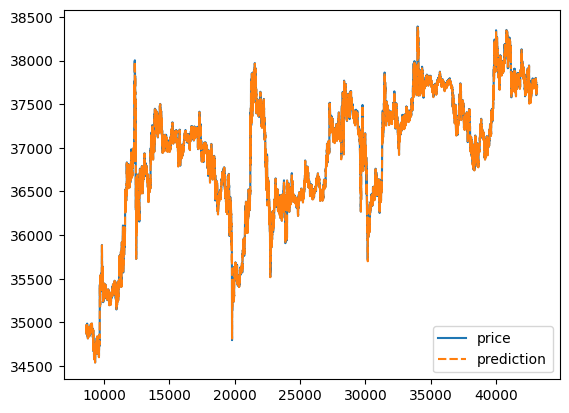

In [26]:
reg=LinearRegression().fit(X_train,y_train)

y_pred_lr = reg.predict(X_test)
y_pred_lr=pd.DataFrame(y_pred_lr,index=y_test.index,columns=['prediction'])
gh=pd.concat([y_test,y_pred_lr],axis=1)
sns.lineplot(data=gh)

In [27]:
# Evaluating the model using Mean Squared Error

mse = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error =", mse)

Mean Squared Error = 529.2382686263197


## 2. Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [30]:
y_pred_rf = rf.predict(X_test)

<Axes: >

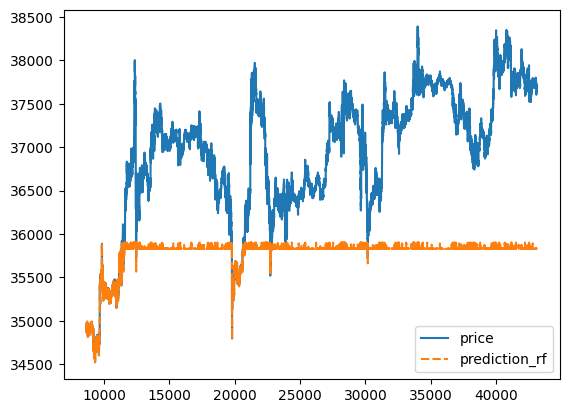

In [31]:
y_pred_rf = pd.DataFrame(y_pred_rf,index=y_test.index,columns=['prediction_rf'])
gh = pd.concat([y_test,y_pred_rf],axis=1)
sns.lineplot(data=gh)

In [32]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error: {mse_rf}")

Mean Squared Error: 1695061.3146482646
